In [1]:
#задачи трансформирования данных (сокращение размерности)
#Предварительная обработка данных с целью подавления шумов, уменьшения вычислительных затрат
#преобразование Фурье - переход в полярные координаты
#Делаем преобразование фурье и берем фазы и по фазам восстанавливаем изображение лица

In [2]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
print(people['target'].shape)
print(people['images'].shape)
print(people['target_names'].shape)
import matplotlib.pyplot as plt
plt.imshow(people['images'][9, :, :])

(3023,)
(3023, 87, 65)
(62,)


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()

X = cancer['data']
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=cancer.target, random_state=1)
print("X_train.shape: {}\n".format(X_train.shape))
print("X_test.shape: {}\n".format(X_test.shape))

MMS = MinMaxScaler(copy=True, feature_range=(0,1))
MMS.fit(X_train)
X_train_scaled = MMS.transform(X_train)
#MMS.fit(X_train, y_train)
print("X_train: {}\n".format(X_train))
print("X_train_scaled: {}\n".format(X_train_scaled))
print("X_train.min: {}\n".format(X_train.min(axis=0)))
print("X_train.max: {}\n".format(X_train.max(axis=0)))
print("X_train_scaled.min: {}\n".format(X_train_scaled.min(axis=0)))
print("X_train_scaled.max: {}\n".format(X_train_scaled.max(axis=0)))

X_test_scaled = MMS.transform(X_test)
print("X_test_scaled.min: {}\n".format(X_test_scaled.min(axis=0)))
print("X_test_scaled.max: {}\n".format(X_test_scaled.max(axis=0)))

X_train.shape: (426, 30)

X_test.shape: (143, 30)

X_train: [[9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [1.205e+01 1.463e+01 7.804e+01 ... 6.548e-02 2.747e-01 8.301e-02]
 [1.288e+01 1.822e+01 8.445e+01 ... 1.096e-01 2.582e-01 8.893e-02]
 ...
 [1.754e+01 1.932e+01 1.151e+02 ... 1.939e-01 2.928e-01 7.867e-02]
 [1.270e+01 1.217e+01 8.088e+01 ... 8.224e-02 2.775e-01 9.464e-02]
 [1.919e+01 1.594e+01 1.263e+02 ... 1.777e-01 2.443e-01 6.251e-02]]

X_train_scaled: [[0.11619102 0.27474048 0.11077327 ... 0.17360825 0.21121407 0.17263545]
 [0.23990724 0.14705882 0.23668026 ... 0.22501718 0.2808268  0.18345796]
 [0.27918974 0.27128028 0.28097574 ... 0.3766323  0.24162509 0.22228781]
 ...
 [0.49973969 0.30934256 0.49277866 ... 0.66632302 0.32382989 0.15499147]
 [0.27067064 0.06193772 0.25630571 ... 0.28261168 0.28747921 0.25974026]
 [0.57783142 0.19238754 0.57017483 ... 0.61065292 0.20860062 0.04899646]]

X_train.min: [6.981e+00 1.038e+01 4.379e+01 1.435e+02 5.263e-02 2.650e

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

X_train.shape: (45, 2)
X_test.shape: (5, 2)



Text(0.5, 1.0, 'baaaad')

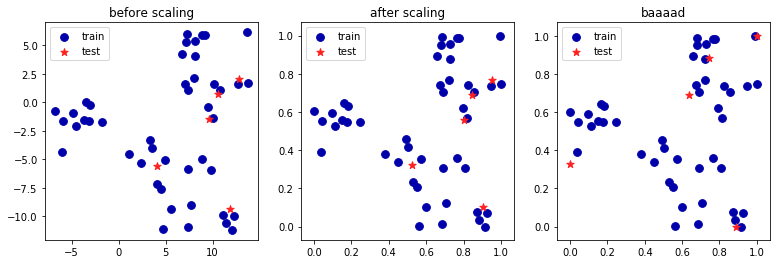

In [4]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import mglearn
import matplotlib.pyplot as plt


X,y = make_blobs(random_state = 4, n_samples=50, centers=5, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size = .1)
print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}\n".format(X_test.shape))

fig, axes = plt.subplots(1,3, figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2(0),label="train",s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], c=mglearn.cm2(1), marker='*',label="test",s=60)
axes[0].legend(loc='best')
axes[0].set_title("before scaling")

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0),label="train",s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=mglearn.cm2(1), marker='*',label="test",s=60)
axes[1].legend(loc='best')
axes[1].set_title("after scaling")

test_sc = MinMaxScaler()
test_sc.fit(X_test)
X_test_bad = test_sc.transform(X_test)

axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0),label="train",s=60)
axes[2].scatter(X_test_bad[:,0], X_test_bad[:,1], c=mglearn.cm2(1), marker='*',label="test",s=60)
axes[2].legend(loc='best')
axes[2].set_title("baaaad")

In [5]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt

X,y = make_blobs(random_state = 4, n_samples=50, centers=5, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size = .1)
print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}\n".format(X_test.shape))

scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
X_scaled_d = scaler.fit(X).fit_transform(X)

X_train.shape: (45, 2)
X_test.shape: (5, 2)



In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import mglearn

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svm = SVC(C = 100, random_state=0).fit(X_train,y_train)
print("SVC.score train: {:.2f}%".format(svm.score(X_train, y_train)*100))
print("SVC.score test: {:.2f}%\n".format(svm.score(X_test, y_test)*100))

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(C = 100, random_state=0).fit(X_train_scaled,y_train)
print("SVC.score train: {:.2f}%".format(svm.score(X_train_scaled, y_train)*100))
print("SVC.score test: {:.2f}%\n".format(svm.score(X_test_scaled, y_test)*100))

scaler2 = StandardScaler()
scaler2.fit(X_train)
X_train_scaled = scaler2.transform(X_train)
X_test_scaled = scaler2.transform(X_test)

svm = SVC(C = 100, random_state=0).fit(X_train_scaled,y_train)
print("SVC.score train: {:.2f}%".format(svm.score(X_train_scaled, y_train)*100))
print("SVC.score test: {:.2f}%\n".format(svm.score(X_test_scaled, y_test)*100))

SVC.score train: 100.00%
SVC.score test: 62.94%

SVC.score train: 98.59%
SVC.score test: 96.50%

SVC.score train: 100.00%
SVC.score test: 95.80%



before: (569, 30)
after: (569, 2)



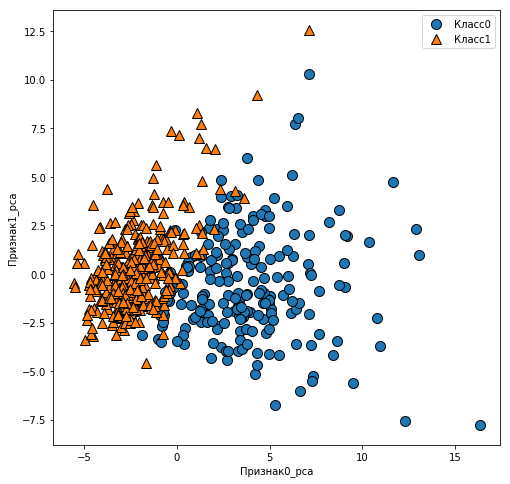

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import mglearn
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("before: {}".format(X_scaled.shape))
print("after: {}\n".format(X_pca.shape))
#pca не оставляет признаки он делает новые из комбинаций старых


plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], y)
plt.xlabel("Признак0_pca")
plt.ylabel("Признак1_pca")
plt.legend(["Класс0","Класс1"])


(62,)
(3023, 87, 65)
(3023,)
Alejandro Toledo           39Alvaro Uribe               35Amelie Mauresmo            21
Andre Agassi               36Angelina Jolie             20Ariel Sharon               77
Arnold Schwarzenegger      42Atal Bihari Vajpayee       24Bill Clinton               29
Carlos Menem               21Colin Powell              236David Beckham              31
Donald Rumsfeld           121George Robertson           22George W Bush             530
Gerhard Schroeder         109Gloria Macapagal Arroyo    44Gray Davis                 26
Guillermo Coria            30Hamid Karzai               22Hans Blix                  39
Hugo Chavez                71Igor Ivanov                20Jack Straw                 28
Jacques Chirac             52Jean Chretien              55Jennifer Aniston           21
Jennifer Capriati          42Jennifer Lopez             21Jeremy Greenstock          24
Jiang Zemin                20John Ashcroft              53John Negroponte            31
Jos

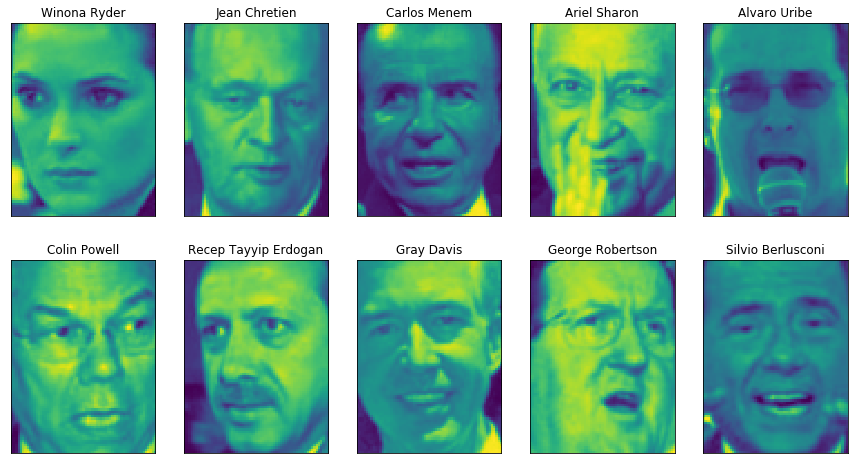

In [8]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
import numpy as np

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix,axes = plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks':(),'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    
print(people['target_names'].shape)
print(people['images'].shape)
print(people['target'].shape)

counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name,count), end = '')
    if (i+1) % 3 == 0:
        print()

In [9]:
mask  = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique (people.target):
    mask[np.where(people.target == target) [0][:50]] = 1
    X_people = people.data[mask]
    y_people = people.target[mask]
X_people = X_people/255

print(X_people.shape)
print(y_people.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(n_neighbors = 1)
estimator.fit(X_train, y_train)

print("knn.score train: {:.2f}%".format(estimator.score(X_train, y_train)*100))
print("knn.score test: {:.2f}%\n".format(estimator.score(X_test, y_test)*100))

(2063, 5655)
(2063,)
knn.score train: 100.00%
knn.score test: 23.45%



In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten = True, random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("after pca train: {}\n".format(X_train_pca.shape))

estimator = KNeighborsClassifier(n_neighbors = 1)
estimator.fit(X_train_pca, y_train)

print("knn.score train: {:.2f}%".format(estimator.score(X_train_pca, y_train)*100))
print("knn.score test: {:.2f}%\n".format(estimator.score(X_test_pca, y_test)*100))

after pca train: (1547, 100)

knn.score train: 100.00%
knn.score test: 30.62%



In [11]:
print("pca.components_.shape: ", pca.components_.shape)

pca.components_.shape:  (100, 5655)


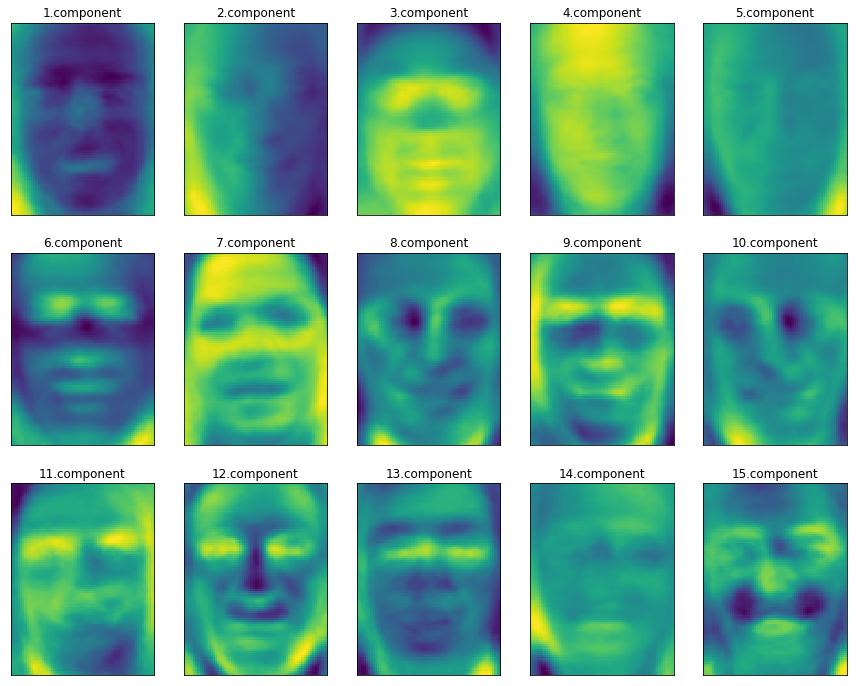

In [12]:
fix, axes = plt.subplots(3,5, figsize = (15,12), subplot_kw={'xticks':(),'yticks':()})
for i, (component,ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}.component".format((i+1)))